In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [2]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
def show_image(img):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_path():
  while True:
    path = input("Enter the image path: ")
    return path
img_path = get_path();
img = image.load_img(img_path, target_size=(32,32,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
image=np.array(x);
image[0,1,3]
show_image(image[0]);


Enter the image path: ;;


KeyboardInterrupt: Interrupted by user

In [3]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
test_images[0].shape

(32, 32, 3)

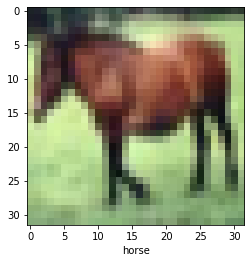

In [4]:
# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
model.summary()  # let's have a look at our model so far

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.5218 - accuracy: 0.4457 - val_loss: 1.2216 - val_accuracy: 0.5614
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1504 - accuracy: 0.5920 - val_loss: 1.1099 - val_accuracy: 0.6048
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9925 - accuracy: 0.6506 - val_loss: 0.9600 - val_accuracy: 0.6605
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8973 - accuracy: 0.6857 - val_loss: 0.9178 - val_accuracy: 0.6793
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8268 - accuracy: 0.7095 - val_loss: 0.9355 - val_accuracy: 0.6726
Epoch 6/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.7708 - accuracy: 0.7292 - val_loss: 0.9021 - val_accuracy: 0.6866
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7218 - accuracy: 0.7464 - val_loss: 0.8646 -

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 2s - loss: 0.8779 - accuracy: 0.7107
0.7106999754905701


In [9]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[20]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image
print(img.shape)

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
#     plt.figure(i)
    new_image=image.img_to_array(batch[0])
    print(new_image.shape)
#     plot = plt.imshow()
    i += 1
    if i > 1:  # show 4 images
        break

# plt.show()

(1, 32, 32, 3)
(32, 32, 3)
(32, 32, 3)


In [10]:
model.save("dogs_vs_cats.h5")  # we can save the model and reload it at anytime in the future
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')

In [10]:
IMG_SHAPE = (160, 160, 3)

# Create the base model from the pre-trained model MobileNet V2
model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
def predict(model, image):
  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
  show_image(image)

def show_image(img):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_path():
  while True:
    path = input("Enter the image path: ")
    return path
img_path = get_path()
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

predict(model, x)